<a href="https://colab.research.google.com/github/DevHyunseo/PoscoAcademy_Bigdata/blob/main/%EA%B3%BC%EC%A0%9C_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## (1) 데이터 구성하기

In [ ]:
#데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/빅데이터주간/01 실습파일/2. Big Data 분석/DIABETES.csv", encoding = "euc-kr")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


### [데이터 확인]
 - Y: 목표 변수 (당뇨 발병확률)
 - AGE: 나이
 - GENDER: 성별 (1-남성,2-여성)
 - BMI: 체질량지수
 - BP: 혈압
 - CHOLESTEROL: 총 콜레스테롤 수치
 - LDL: LDL수치
 - HDL: HDL수치
 - TCH: TCH수치
 - LTG: 라모트리진
 - GLUCOSE: 포도당

### [데이터 확인 결과]
 - 수치형 변수 없음, 단위 항목 없음, Dummy 변수화 필요 없음 확인

In [ ]:
# 결측치 확인
df_raw.isnull().sum()
# 결측치가 없음.

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [ ]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [ ]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


## (2) 모델 생성 - 기본 옵션으로 모델 생성

In [ ]:
#랜덤 포레스트 모델
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.919
Score on test set: 0.455


### <기본 옵션으로 모델 생성 후 분석 결과>
- Score on training set: 0.919
- Score on test set: 0.455
- 이 모델이 train 데이터에 과적합되어 있음을 알 수 있음.

In [ ]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

## (3) 모델 parameter 조정 : n_estimators

In [ ]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [ ]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.892,0.393
1,20,0.908,0.404
2,30,0.908,0.432
3,40,0.911,0.442
4,50,0.914,0.458
5,60,0.915,0.454
6,70,0.915,0.451
7,80,0.917,0.451
8,90,0.919,0.450
9,100,0.919,0.455


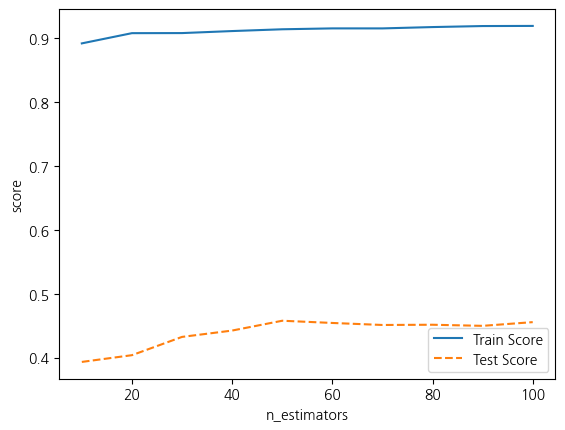

In [ ]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

### <그래프 확인 결과>
- 생성하는 결정 트리 수 증가에 따라 모델 설명력이 증가함.
- 트리의 수가 50개 초과된 이후부터는 설명력이 거의 향상되지 않으므로 50 선택

## (4) 모델 parameter 조정 : min_samples_leaf

In [ ]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 50,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.914,0.458
1,2,0.877,0.466
2,3,0.831,0.467
3,4,0.782,0.465
4,5,0.748,0.460
5,6,0.715,0.460
6,7,0.694,0.466
7,8,0.670,0.467
8,9,0.651,0.474
9,10,0.634,0.469


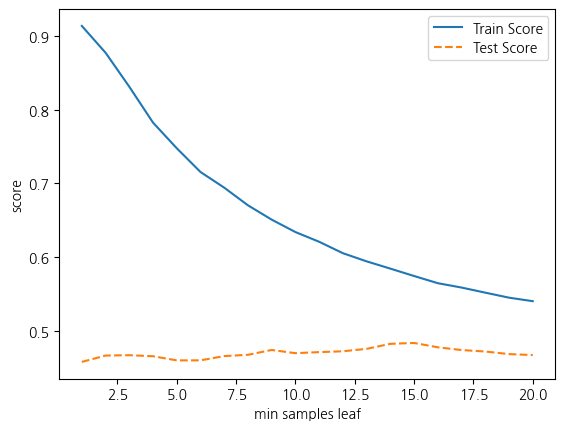

In [ ]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

### <그래프 확인 결과>
- 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소함
- test 데이터의 정확도 변화와 일반화를 고려하여 15를 선택.

## (5) 모델 parameter 조정 : min_samples_split

In [ ]:
# train 및 test 설명력 결과 저장
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 50, min_samples_leaf = 15,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.574,0.483
1,6,0.574,0.483
2,8,0.574,0.483
3,10,0.574,0.483
4,12,0.574,0.483
5,14,0.574,0.483
6,16,0.574,0.483
7,18,0.574,0.483
8,20,0.574,0.483
9,22,0.574,0.483


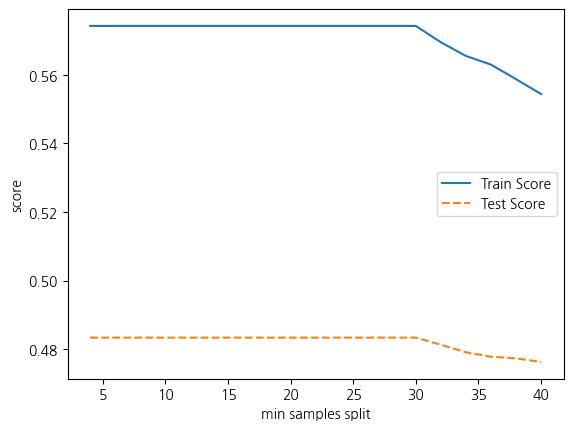

In [ ]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

### <그래프 확인 결과>
- 분리 노드 최소 자료 수가 증가에 따라 모델의 설명력은 일정하다가 30에서 떨어지기 시작함.
- train, test 데이터의 성능 변화를 고려하여 30을 선택

## (6) 모델 parameter 조정 : max_depth

In [ ]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 50,
                               min_samples_leaf = 15, min_samples_split = 30,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.386,0.399
1,2,0.488,0.469
2,3,0.546,0.489
3,4,0.567,0.485
4,5,0.574,0.484
5,6,0.574,0.483
6,7,0.574,0.483
7,8,0.574,0.483
8,9,0.574,0.483
9,10,0.574,0.483


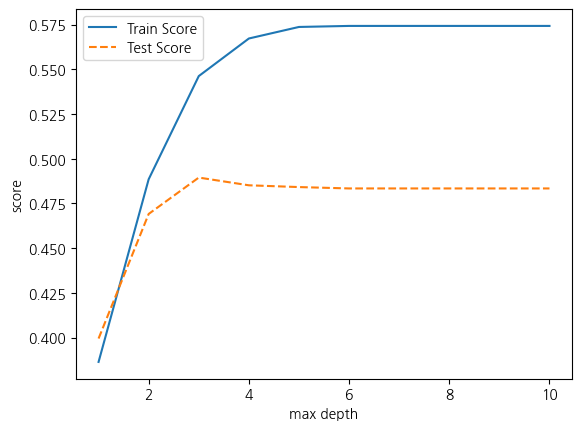

In [ ]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

### <그래프 확인 결과>
- 최대 깊이 증가에 따라 모델의 설명력은 증가함
- train, test데이터의 정확도 변화를 고려하여 3으로 선택

## (7) 결론 도출 - 최종 모델 생성

In [ ]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 50, min_samples_leaf = 15,
                                 min_samples_split = 30, max_depth = 3)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.546
Score on test set: 0.489


### <최종 모델의 training set, test set score 비교>
- Score on training set: 0.546
- Score on test set: 0.489
- 기본 옵션으로 설정한 파라미터보다 test 데이터 설명력이 0.455에서 0.489로 소폭 상승함.
- training 데이터 설명력이 과적합되어 있던 것이 0.546으로 줄어들었으므로 유의미한 변화가 있음.

In [ ]:
# 평가용 데이터에 대한 실제값과 예측값(10개) 확인
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값 : 
 [158.0102889  174.86967561 110.54460673  94.25734907 152.52720231
 157.745538   157.90507264  97.61964729 113.58984349 140.59608683]


In [ ]:
#파라미터 값 확인
rf_final.get_params()

# <최종 모델의 하이퍼 파라미터>
# n_estimators : 50
# min_samples_leaf : 15
# min_samples_split : 30
# max_depth : 3

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 15,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

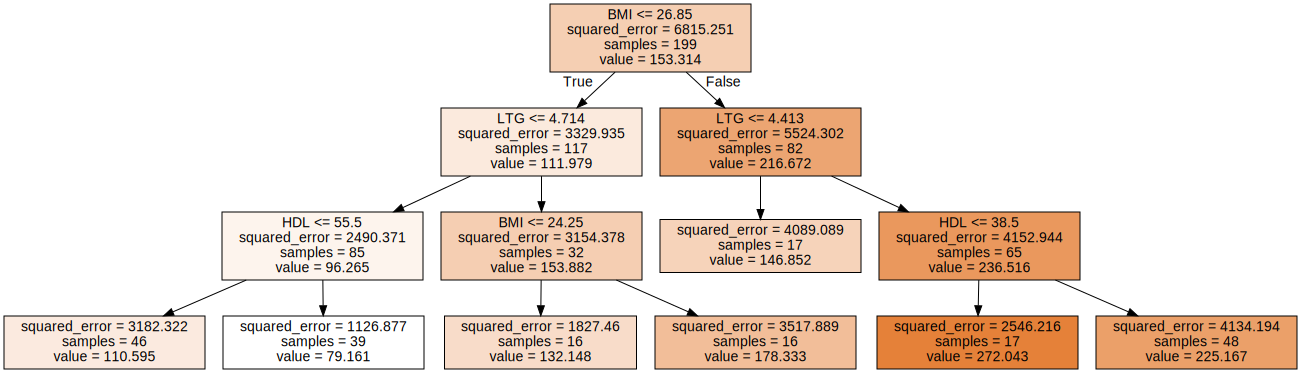

In [ ]:
# 0번 트리 확인
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_name ,
                impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

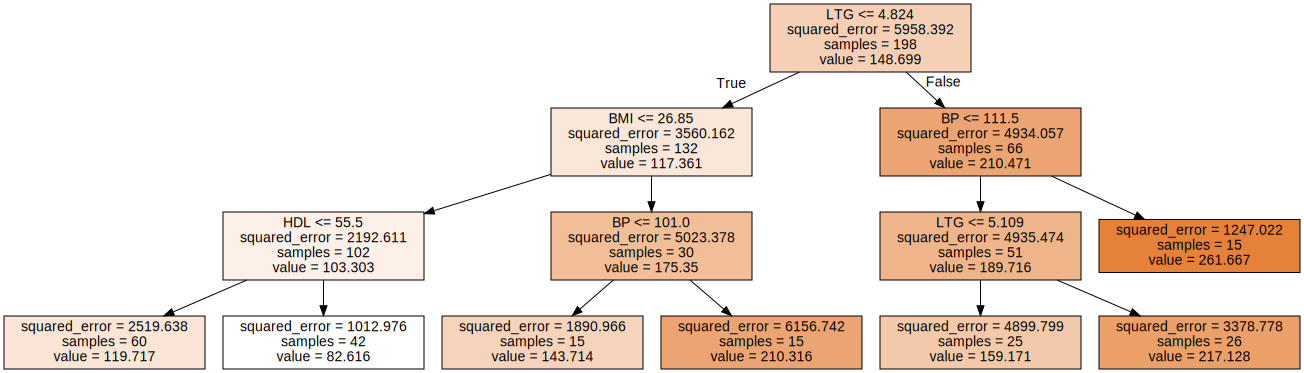

In [ ]:
# 5번 트리 확인
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[5], out_file="rfr_final_0.dot", feature_names = v_feature_name ,
                impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

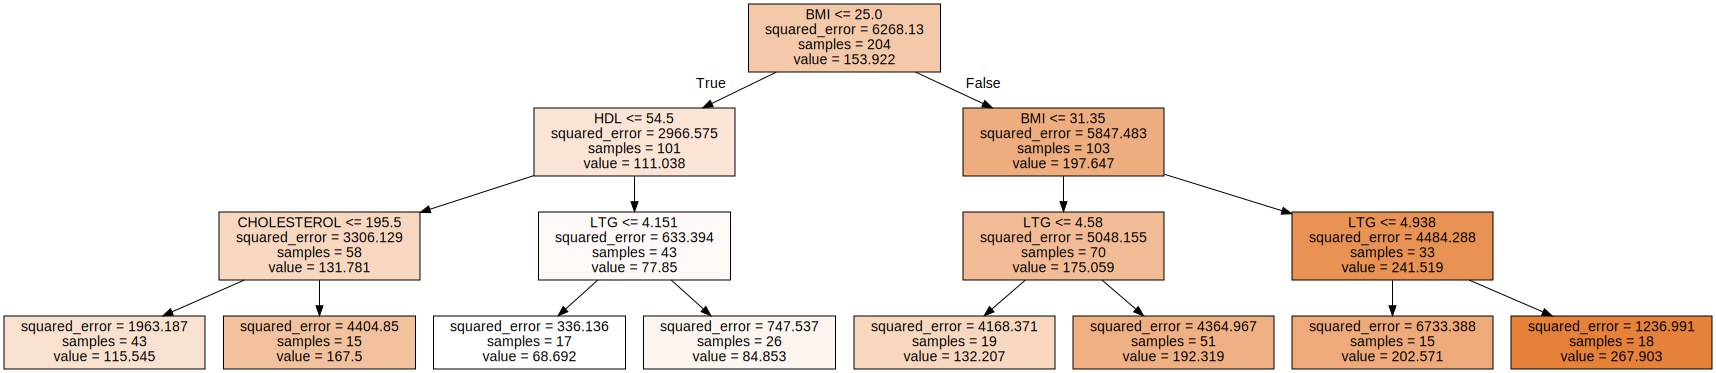

In [ ]:
# 30번 트리 확인
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[30], out_file="rfr_final_0.dot", feature_names = v_feature_name ,
                impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# 위와 같은 트리 50개로 조합하여 최종 모델을 생성함.

## (8) 결론 도출 - 설명변수의 중요도

In [ ]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.455
8,LTG,0.365
9,GLUCOSE,0.068
3,BP,0.047
6,HDL,0.035
7,TCH,0.009
0,AGE,0.008
5,LDL,0.008
4,CHOLESTEROL,0.004
1,GENDER,0.001


Text(0, 0.5, '변수')

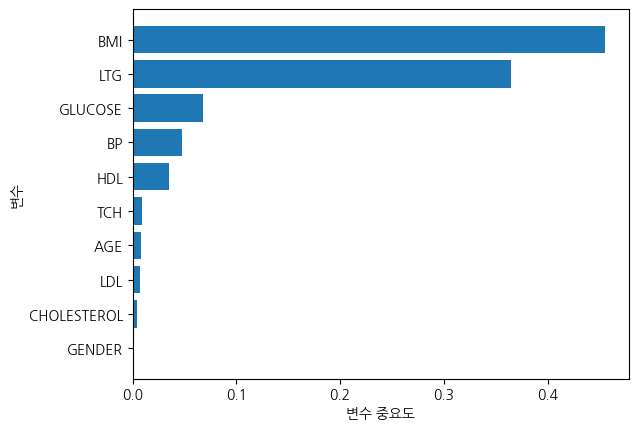

In [ ]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### <최종 모델의 변수 중요도>
- BMI(BMI 지수) : 0.455
- LTG(라모트리진) : 0.365
- GLUCOSE(포도당) : 0.068
- BP(혈압) : 0.047
- HDL(HDL수치) : 0.040
- AGE(나이) : 0.015
- BMI, LTG, GLUCOSE, BP, HDL 순으로 모델 예측에 가장 중요한 설명변수로 나타남.

## (9) GridSearchCV를 이용한 최적의 parameter 찾기

In [ ]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestRegressor(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=6, min_samples_leaf=12, min_samples_split=38,
                      random_state=1234)

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 38}

best score: 
0.417


### < gridSearchCV를 이용한 최적의 parameter 결과>
- max_depth : 6
- min_samples_leaf : 12
- min_samples_split: 38
- best score : 0.417
- 결론 : 직접 hyper paramter를 수정한 앞선 버전의 training score가 0.546, test score가 0.489이므로 grid Search CV보다 유의미하다고 할 수 있음.
